[ Stefano Pigozzi | Tema Data Analytics | Big Data Analytics | A.A. 2022/2023 | Unimore ]

# Attività online correlata all'avanzare della pandemia COVID

> ### Data processing e exploratory data analytics su dataset provenienti da più sorgenti
> 
> L’attività da svolgere consiste nel:
> 1. Scegliere due o più dataset provenienti da due o più sorgenti.  
>     * Il dataset finale deve essere costituito almeno da due file.
> 2. Usando [pandas](https://pandas.pydata.org/) implementare le operazioni di data processing necessarie (principalmente join e selezioni) per mettere in collegamento i dataset e per preparare i dati al passo successivo
> 3. Usando pacchetti Python quali [pandas](https://pandas.pydata.org/), [scipy](https://scipy.org/), [matplotlib](https://matplotlib.org/) e [seaborn](https://seaborn.pydata.org/) implementare attività di data cleaning, exploratory data analysis estraendo dati statistici e di visualizzazione dei risultati attraverso il quale sia possibile "raccontare qualcosa sui dati" (storytelling), eventualmente partendo da dei quesiti di ricerca. L'uso
dei pacchetti non deve necessariamente essere limitato alle istruzioni viste a lezione. Le documentazioni dei pacchetti stessi e i volumi messi a disposizione su Dolly fornisco spunti d’uso interessanti!
> 4. Produrre un notebook Jupyter (https://jupyter.org/) che contenga:
>     * una introduzione all’argomento scelto, alle sorgenti dati e agli obiettivi del progetto specificando
eventualmente i quesiti di ricerca
>     * una sezione per ogni fase del progetto di data analytics

## Abstract

<!-- TODO -->

## Installazione requisiti

Per funzionare, questo progetto necessita di alcuni package Python, scaricabili da [PyPI](https://pypi.org/).

In particolare:

* [numpy](https://pypi.org/project/numpy/1.23.5/)
* [scipy](https://pypi.org/project/scipy/1.9.3/)
* [pandas](https://pypi.org/project/pandas/1.5.2/)
* [matplotlib](https://pypi.org/project/matplotlib/3.6.2/)

In [1]:
%pip install numpy==1.23.5 scipy==1.9.3 pandas==1.5.2 matplotlib==3.6.2

Note: you may need to restart the kernel to use updated packages.


### Import

Nella seguenti celle, si effettua l'`import` di tutti i package utilizzati, in modo da poterli utilizzare nel presente documento Jupyter.

In [2]:
import numpy
numpy

<module 'numpy' from '/store/Documents/Workspaces/Steffo99/unimore-bda-3/.venv/lib/python3.10/site-packages/numpy/__init__.py'>

In [3]:
import scipy
scipy

<module 'scipy' from '/store/Documents/Workspaces/Steffo99/unimore-bda-3/.venv/lib/python3.10/site-packages/scipy/__init__.py'>

In [4]:
import pandas
pandas

<module 'pandas' from '/store/Documents/Workspaces/Steffo99/unimore-bda-3/.venv/lib/python3.10/site-packages/pandas/__init__.py'>

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib

<module 'matplotlib' from '/store/Documents/Workspaces/Steffo99/unimore-bda-3/.venv/lib/python3.10/site-packages/matplotlib/__init__.py'>

Si importano anche alcuni package della standard library di Python utili allo sviluppo:

In [6]:
import pathlib
pathlib

<module 'pathlib' from '/usr/lib/python3.10/pathlib.py'>

In [7]:
import typing as t
t

<module 'typing' from '/usr/lib/python3.10/typing.py'>

In [8]:
import io
io

<module 'io' from '/usr/lib/python3.10/io.py'>

In [9]:
import json
json

<module 'json' from '/usr/lib/python3.10/json/__init__.py'>

In [10]:
import datetime
datetime

<module 'datetime' from '/usr/lib/python3.10/datetime.py'>

## Introduzione

<!-- TODO -->

## Fonti di dati

### Google Trends

[Google Trends](https://trends.google.com/trends/) è un servizio messo a disposizione da Google che permette di ispezionare il volume di ricerca nel tempo e nello spazio per dati termini.

Selezionato un termine o un argomento di ricerca, è possibile esportare un file CSV contenente il volume relativo di ricerca nel tempo, con !!!intervalli!!! variabili da 1 mese a 1 minuto.

#### Esempio

Si allega un esempio di file CSV [esportato da Google Trends per la ricerca "Google"](https://trends.google.com/trends/explore?date=all&q=Google):

```csv
Categoria: Tutte le categorie

Mese,Google: (Tutto il mondo)
2004-01,6
2004-02,6
2004-03,7
2004-04,8
2004-05,7
2004-06,7
2004-07,7
2004-08,7
2004-09,8
2004-10,8
2004-11,8
2004-12,8
2005-01,8
2005-02,9
[...]
```

#### Importazione dati

Si definisce una funzione, `import_gtrends`, in grado di caricare dati scaricati da Google Trends in un [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [11]:
def import_gtrends(fd: t.IO[str]) -> pandas.DataFrame:
    """
    Import a Google Trends CSV file into a :class:`pandas.Series`.

    :param fd: The file descriptor of the CSV file.
    :return: The imported :class:`pandas.Series`.
    """
    return pandas.read_csv(fd, sep=",", header=1)

Si fornisce un esempio del funzionamento di questa funzione:

In [12]:
with open("data/gtrends/google-worldwide.csv") as file:
    google_worldwide = import_gtrends(file)

google_worldwide

,Month,Google: (Worldwide)
0,2004-01,6
1,2004-02,6
2,2004-03,6
3,2004-04,8
4,2004-05,7
...,...,...
222,2022-07,50
223,2022-08,51
224,2022-09,55
225,2022-10,54


In [13]:
# Cleanup example data
del file
del google_worldwide

### Telegram

[Telegram](https://telegram.org/), per conformità al GDPR, permette di [esportare i contenuti di una o più chat](https://t.me/gdprbot) in cui si è presenti in un file JSON leggibile da calcolatori.

#### Esempio

Si allega un esempio di file JSON esportato da Telegram per una chat creata appositamente per lo scopo:

```json
{
    "name": "Esempio",
    "type": "private_group",
    "id": 660884870,
    "messages": [
        {
            "id": 1531670,
            "type": "service",
            "date": "2022-12-02T14:49:03",
            "date_unixtime": "1669988943",
            "actor": "Steffo",
            "actor_id": "user25167391",
            "action": "create_group",
            "title": "Esempio",
            "members": [
                "Steffo"
            ],
            "text": "",
            "text_entities": []
        },
        {
            "id": 1531671,
            "type": "message",
            "date": "2022-12-02T14:49:11",
            "date_unixtime": "1669988951",
            "from": "Steffo",
            "from_id": "user25167391",
            "text": "Questo è un messaggio di esempio.",
            "text_entities": [
                {
                    "type": "plain",
                    "text": "Questo è un messaggio di esempio."
                }
            ]
        }
    ]
}
```

#### Importazione dati

Il file esportato da Telegram contiene tutte le informazioni di ogni evento di quella chat, inclusi gli autori e i contenuti dei messaggi: sono **dati sensibili**, e non possono essere inclusi per motivi di privacy.

Visto però che l'unico dato rilevante ai fini di questa ricerca è la **data di invio di ciascun messaggio**, tutte le informazioni possono essere rimosse dal dataset, rendendolo così privo di informazioni sensibili.

Si definisce una funzione, `anonymize_telegram`, in grado di leggere i file JSON esportati da Telegram e di restituire da essi una lista di date in cui sono stati inviati messaggi.

In [14]:
def anonymize_telegram(fd: t.IO[str]) -> list[datetime.datetime]:
    """
    Read a Telegram GDPR export file, stripping everything but the messages' dates from it, returning a :class:`list` of :class:`str`s.

    :param fd: The input file descriptor.
    :returns: The list of :class:`str`s.
    """
    data = json.load(fd)
    msgs = data["messages"]

    def msg_to_date(msg: dict[str, t.Any]) -> str:
        """
        Convert a message :class:`dict` to the :class:`datetime.datetime` of its creation.

        :param msg: The message to convert.
        :return: The date the message was sent on.
        """
        return msg["date"]

    return list(map(msg_to_date, msgs))

Si fornisce un esempio del funzionamento di questa funzione:

In [15]:
with open("data/telegram/example.json") as file:
    telegram_example = anonymize_telegram(file)

telegram_example

['2022-12-02T14:49:03', '2022-12-02T14:49:11']

I dati così anonimizzati possono essere allegati alla relazione: si definisce una funzione `store_telegramanon` in grado di archiviare le liste di date create dalla precedente funzione in un file formato Pickle.

In [16]:
def store_telegramanon(l: list[str], fd: t.IO[str]) -> None:
    """
    Store a :class:`list` generated by :func:`anonymize_telegram` in a binary file descriptor.

    :param l: The :class:`list` to store.
    :param fd: The file descriptor to write to.
    """
    json.dump(l, fd)

Si fornisce un esempio del funzionamento di questa funzione:

In [17]:
with open("data/telegramanon/example.json", "w") as file:
   store_telegramanon(telegram_example, file)

Infine, si definisce una funzione, `import_telegramanon`, in grado di leggere i dati precedentemente archiviati in un [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html):

In [18]:
def import_telegramanon(fd: t.IO[bytes]) -> pandas.DataFrame:
    """
    Import a :class:`list` stored by :func:`store_telegramanon` into a :class:`pandas.DataFrame`.

    :param fd: The file descriptor to read from.
    :return: The imported :class:`pandas.Series`.
    """
    data = json.load(fd)
    dataframe = pandas.DataFrame(data)
    dataframe["date"] = pandas.to_datetime(dataframe[0])
    del dataframe[0]
    return dataframe

Ancora, si fornisce un esempio del funzionamento di questa funzione:

In [19]:
with open("data/telegramanon/example.json", "rb") as file:
    telegramanon_example = import_telegramanon(file)

telegramanon_example

,date
0,2022-12-02 14:49:03
1,2022-12-02 14:49:11


In [20]:
# Cleanup example data
del file
del telegram_example
del telegramanon_example

### Dipartimento della Protezione Civile della Presidenza del Consiglio dei Ministri

Il Dipartimento della Protezione Civile [mette a disposizione un repository Git contenente i dati relativi alla diffusione del COVID-19 in Italia](https://github.com/pcm-dpc/COVID-19).

All'interno del repository Git, i dati sono disponibili in formato CSV e JSON.

Il repository è allegato a questo progetto come Git Submodule.

Essendo di dimensioni significative, di default non viene scaricato da Git, ma è possibile effetuarne il download con i seguente comandi:

In [21]:
!git submodule init
!git submodule update

#### Esempio

Si riporta un esempio di oggetto del file JSON `data/covid19/dati-json/dpc-covid19-ita-andamento-nazionale.json`:

```json
{
    "data":"2022-12-01T17:00:00",
    "stato":"ITA",
    "ricoverati_con_sintomi":8458,
    "terapia_intensiva":320,
    "totale_ospedalizzati":8778,
    "isolamento_domiciliare":498391,
    "totale_positivi":507169,
    "variazione_totale_positivi":4342,
    "nuovi_positivi":36598,
    "dimessi_guariti":23799178,
    "deceduti":181733,
    "casi_da_sospetto_diagnostico":"",
    "casi_da_screening":"",
    "totale_casi":24488080,
    "tamponi":258382332,
    "casi_testati":66089134,
    "note":"",
    "ingressi_terapia_intensiva":51,
    "note_test":"",
    "note_casi":"",
    "totale_positivi_test_molecolare":9573057,
    "totale_positivi_test_antigenico_rapido":14915023,
    "tamponi_test_molecolare":98917043,
    "tamponi_test_antigenico_rapido":159465289
}
```

#### Importazione dati

Ai fini di questa relazione, si è particolarmente interessati ai dati contenuti nel file `data/covid19/dati-json/dpc-covid19-ita-andamento-nazionale.json`, che contiene le statistiche delle infezioni di COVID-19 a livello nazionale.

Si definisce una funzione `import_covid19`, che importa i dati di quel file JSON in un [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html):

In [22]:
def import_covid19(fd: t.IO[str]) -> pandas.DataFrame:
    """
    Import data from the given file descriptor to ``dpc-covid19-ita-andamento-nazionale.json`` into a :class:`pandas.DataFrame`.

    :param fd: The file descriptor.
    :return: The :class:`pandas.DataFrame`.
    """
    dataframe = pandas.read_json(fd)
    dataframe["data"] = pandas.to_datetime(dataframe["data"])
    return dataframe

## Analisi esploratoria iniziale

### Importazione dati dell'andamento dei contagi di COVID-19 in Italia

Si effettua immediatamente l'importazione dei dati del COVID-19 all'interno della variabile `frame_covid19`:

In [23]:
with open("data/covid19/dati-json/dpc-covid19-ita-andamento-nazionale.json") as file:
    covid19_frame = import_covid19(file)

covid19_frame

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,2022-11-27 17:00:00,ITA,7865,274,8139,489914,498053,-194,23956,23672245,...,257593104,65956542.0,None,39.0,NaN,NaN,9554305.0,14797315.0,98786040.0,158807064.0
1008,2022-11-28 17:00:00,ITA,8040,283,8323,481655,489978,-8075,12266,23692505,...,257670989,65971834.0,None,29.0,NaN,NaN,9555593.0,14808293.0,98800734.0,158870255.0
1009,2022-11-29 17:00:00,ITA,8179,289,8468,492208,500676,10698,50626,23732286,...,257958950,66016484.0,None,41.0,NaN,NaN,9563512.0,14850994.0,98840305.0,159118645.0
1010,2022-11-30 17:00:00,ITA,8361,303,8664,494163,502827,2151,36981,23767026,...,258171545,66052975.0,None,50.0,NaN,NaN,9567925.0,14883558.0,98879379.0,159292166.0


### Positivi a COVID-19 nel tempo

Per verificare che il dataset sia stato importato correttamente, si realizza il grafico a linea dei pazienti positivi al COVID-19 nel tempo:

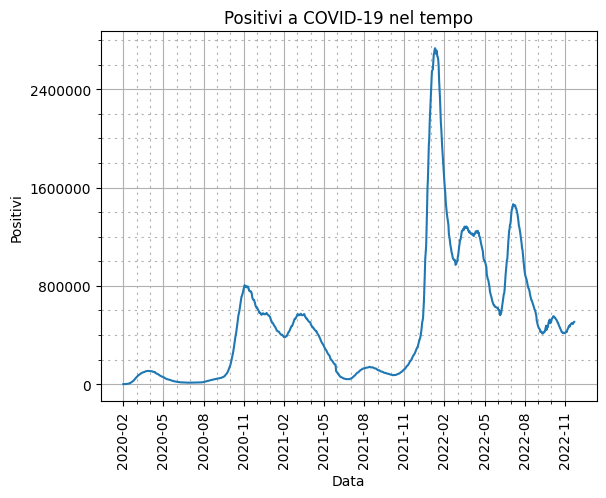

In [24]:
### Datasets ###
x = covid19_frame["data"]
y = covid19_frame["totale_positivi"]

### Chart ###
plt.plot(x, y)
plt.title("Positivi a COVID-19 nel tempo")
pca = plt.gca()

### X ###
plt.xlabel("Data")
plt.xticks(
   ticks=x.iloc[::90], 
   labels=x.map(lambda d: d.strftime("%Y-%m")).iloc[::90],
   minor=False,
   rotation=90,
)
plt.xticks(
   ticks=x.iloc[::30],
   minor=True,
)

### Y ###
plt.ylabel("Positivi")
pca.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
pca.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(4))
plt.ticklabel_format(axis="y", style="plain")

### Grid ###
plt.grid(visible=True, which="major")
plt.grid(visible=True, which="minor", dashes=(2, 4))

### Cleanup ###
del x
del y

### Display ###
plt.show()